### <p style="text-align: right;"> &#9989; Jacob Jensen

#### <p style="text-align: right;"> &#9989; Carter, Kayla, Mitchel

# Day 8 In-Class Assignment: Modeling Disease with ODEs

<img src="https://slopefield.files.wordpress.com/2016/03/runge-kutta.png?w=663" width= 400><p style="text-align: right;">
</p>

## Learning Goals

- Finalize the algorithm for Euler's method
- Implement a higher order method
- Compare the solutions of each algorithm

## Assignment instructions

Today, *with your group*, you're going to continue the previous class activity and build a more sophisticated version of your model.

**This assignment is due at the end of class** and should be uploaded into the appropriate "In-class Assignments" dropbox folder on D2L.  Submission instructions can be found at the end of the notebook.

---
# Euler's Method

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/10/Euler_method.svg/220px-Euler_method.svg.png" width= 200><p style="text-align: right;">


In the space provided below, copy and paste your work from the previous class. 

If you were able to complete your algorithm for Euler's method, run the cell to make sure it is still behaving properly. Once the group is familiarized with everything again, move on to implementing the midpoint method.

If you were not able to complete your algorithm for Euler's method, continue working on it in this notebook until the group is finished.

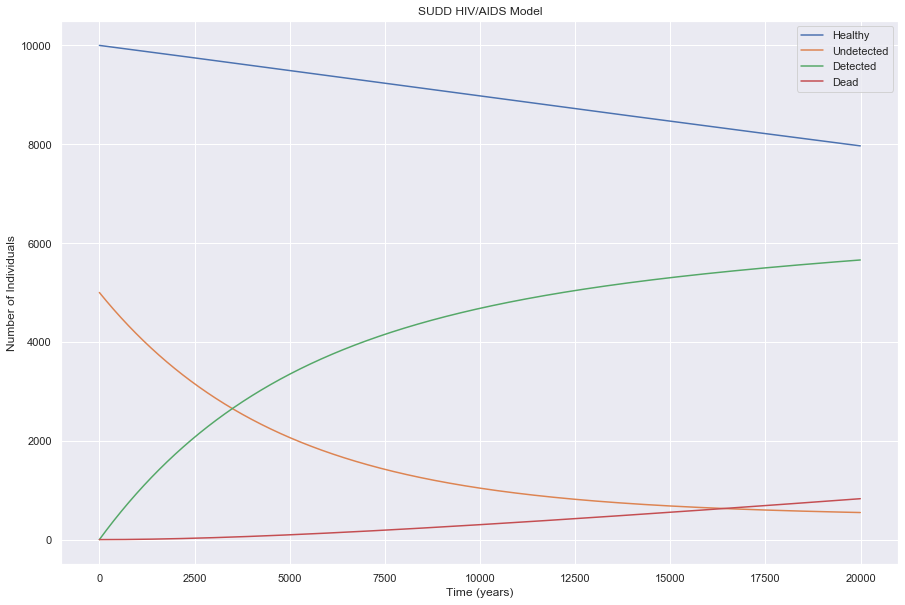

In [27]:
# put your code here and make sure to visualize your results!
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

def updateFunc (H, A, S, D, alpha, beta, chi):
    
    dH = -H * alpha * (A + S)
    dA = (H * alpha * (A + S)) - (beta * A)
    dS = (beta * A) - (chi * S)
    dD = chi * S
    
    return dH, dA, dS, dD
dt = 10
timeAr = np.arange(0, 20000, dt)

Hpop = 10000
Apop = 5000
Spop = 0
Dpop = 0

hLisE, aLisE, sLisE, dLisE = [[],[],[],[]]

alpha = 0.00000002
beta = 17000/8100000
chi = 0.0001

for i in timeAr:
    
    hLisE.append(Hpop)
    aLisE.append(Apop)
    sLisE.append(Spop)
    dLisE.append(Dpop)
    
    dH, dA, dS, dD = updateFunc(Hpop, Apop, Spop, Dpop, alpha, beta, chi)
    
    Hpop += dH
    Apop += dA
    Spop += dS
    Dpop += dD

plt.figure(figsize = (15,10))
plt.plot(timeAr, hLisE, label = "Healthy")
plt.plot(timeAr, aLisE, label = "Undetected")
plt.plot(timeAr, sLisE, label = "Detected")
plt.plot(timeAr, dLisE, label = "Dead")
plt.xlabel("Time (years)")
plt.ylabel("Number of Individuals")
plt.title("SUDD HIV/AIDS Model")
plt.legend()
plt.show()

# Midpoint Method

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/39/Midpoint_method_illustration.png/220px-Midpoint_method_illustration.png" width= 200>


In terms of difficulty, the [midpoint method](https://en.wikipedia.org/wiki/Midpoint_method) is the next level above Euler's method. If you recall, Euler's method is defined as

$$
y_{n+1} = y_n + dt*f(t_n, y_n)
$$

where the function $f$ is your ODE. The midpoint method is different in that it uses Euler's method to solve for a point that is halfway between $t_n$ and $t_{n+1}$ since the slope generated by that halfway point will yield a better approximation for the shape of the unknown curve. Once you have the slope, and location, of the halfway point you can use Euler's method *again* to get all the way to $y_{n+1}$. So, the midpoint method is defined as

$$
y_{n+1} = y_n + dt*f\Big(t_n + \frac{dt}{2}, y_n + \frac{dt}{2}f(t_n, y_n)\Big)
$$

where $f$ is your ODE. 

The value of using the midpoint method is that you are able to get to a more accurate solution without having to make your time step, dt, smaller. It can be implemented into code in the same fashion as Euler's method too! 

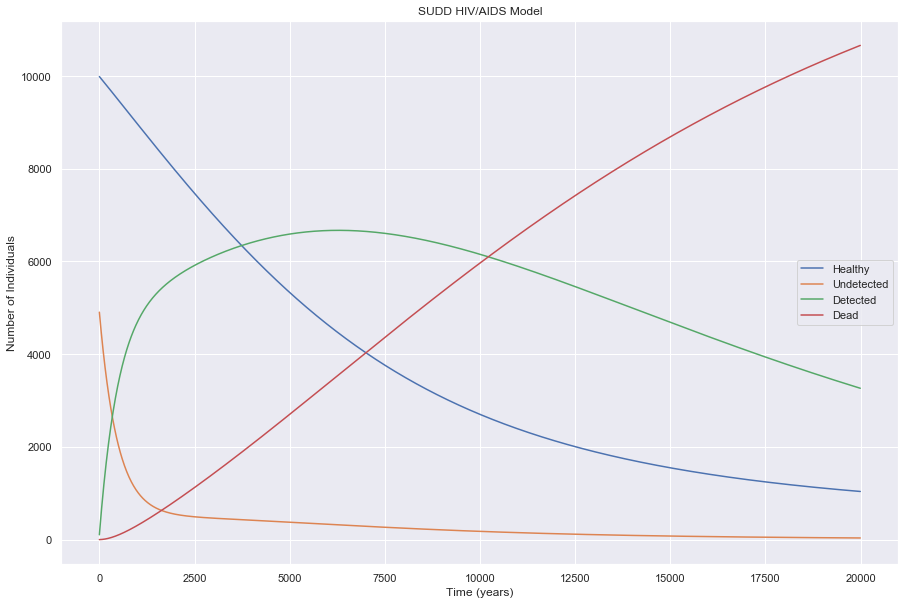

In [28]:
# Put your code here that implements a solution for your ODEs using the Midpoint Method
# put your code here and make sure to visualize your results!
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

def updateFunc (H, A, S, D, alpha, beta, chi):
    
    dH = -H * alpha * (A + S)
    dA = (H * alpha * (A + S)) - (beta * A)
    dS = (beta * A) - (chi * S)
    dD = chi * S
    
    return dH, dA, dS, dD
dt = 10
stepTimeAr = np.arange(0, 20000, dt)


Hn = 10000
An = 5000
Sn = 0
Dn = 0

hLisM, aLisM, sLisM, dLisM = [[],[],[],[]]

alpha = 0.00000002
beta = 17/8100
chi = 0.0001

for i in timeAr:
    
    dHHalf, dAHalf, dSHalf, dDHalf = updateFunc(Hn, An, Sn, Dn, alpha, beta, chi)
    
    hHalfStep = Hn + dHHalf * dt/2
    aHalfStep = An + dAHalf * dt/2
    sHalfStep = Sn + dSHalf * dt/2
    dHalfStep = Dn + dDHalf * dt/2
    
    dH, dA, dS, dD = updateFunc(hHalfStep, aHalfStep, sHalfStep, dHalfStep, alpha, beta, chi)
    
    HnNext = Hn + dt * dH
    AnNext = An + dt * dA
    SnNext = Sn + dt * dS
    DnNext = Dn + dt * dD
    
    hLisM.append(HnNext)
    aLisM.append(AnNext)
    sLisM.append(SnNext)
    dLisM.append(DnNext)
    
    Hn = HnNext
    An = AnNext
    Sn = SnNext
    Dn = DnNext 
    
plt.figure(figsize = (15,10))
plt.plot(timeAr, hLisM, label = "Healthy")
plt.plot(timeAr, aLisM, label = "Undetected")
plt.plot(timeAr, sLisM, label = "Detected")
plt.plot(timeAr, dLisM, label = "Dead")
plt.xlabel("Time (years)")
plt.ylabel("Number of Individuals")
plt.title("SUDD HIV/AIDS Model")
plt.legend()
plt.show()


# Runge-Kutta Method (RK4)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/7e/Runge-Kutta_slopes.svg/800px-Runge-Kutta_slopes.svg.png" width= 400>



[RK4](https://en.wikipedia.org/wiki/Runge–Kutta_methods) is not as much a jump in difficulty as it is in complexity, which you may be able to guess from the image above. Utilizing both the Euler and Midpoint methods, RK4 is defined by,

$$
y_{n+1} = y_n + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)
$$

where,

$$
k_1 = dt*f(t_n,y_n)
\\
\\
k_2 = dt*f\Big(t_n + \frac{dt}{2},y_n + \frac{k_1}{2}\Big)
\\
\\
k_3 = dt*f\Big(t_n + \frac{dt}{2},y_n + \frac{k_2}{2}\Big)
\\
\\
k_4 = dt*f(t_n+dt,y_n+k_3)
$$

This method requires the same starting information, so your ODEs and an initial value for each of it's components.

**Important Note**: Only try coding up the RK4 method if you think you will have adequate time to get it working. Otherwise, move on to the next section!

In [ ]:
# Time permitting... put your code here that implements a solution for your ODEs using the RK4 method


# Comparing the Methods

Now that you've constructed more than one algorithm for solving your set of ODEs, it's time to see how the results they yield differ. In the space provided below, create a graph that compares each set of solutions. 

Once you have your comparison graph set up, discuss your findings and answer the following questions:

- How drastic are the differences between the solutions? 
- Do the different solutions return identical results for the same time step? Why not?
- Is there a way to make the differences more noticeable? How?
- Is it always necessary to implement the most sophisticated method, or is it okay to use the basic Euler method in certain situations? What would those situations be?

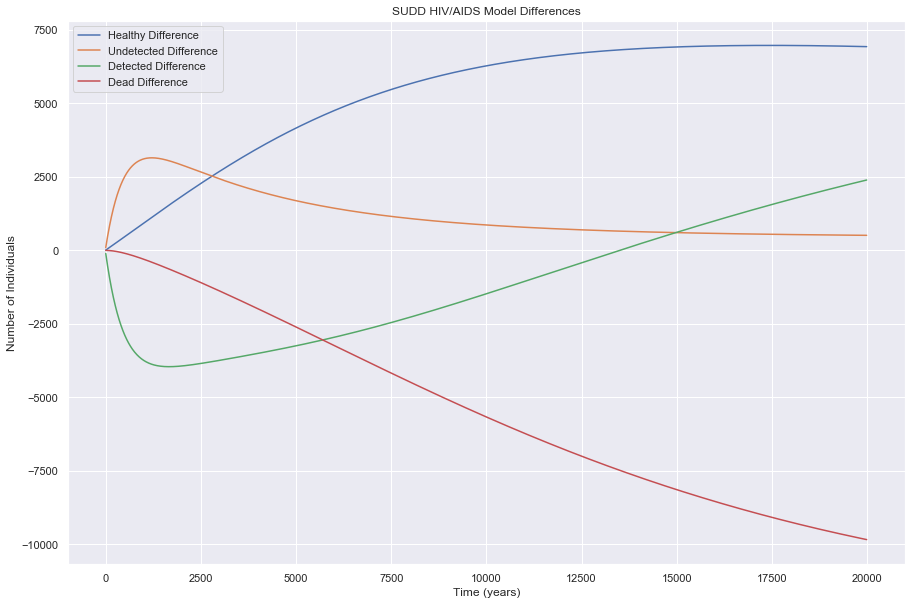

In [29]:
# Put your comparison code here
clH, clA, clS, clD = [[], [], [], []]
for i in range(len(hLisE)):
    clH.append(hLisE[i] - hLisM[i])
    clA.append(aLisE[i] - aLisM[i])
    clS.append(sLisE[i] - sLisM[i])
    clD.append(dLisE[i] - dLisM[i])
    
plt.figure(figsize = (15,10))
plt.plot(timeAr, clH, label = "Healthy Difference")
plt.plot(timeAr, clA, label = "Undetected Difference")
plt.plot(timeAr, clS, label = "Detected Difference")
plt.plot(timeAr, clD, label = "Dead Difference")
plt.xlabel("Time (years)")
plt.ylabel("Number of Individuals")
plt.title("SUDD HIV/AIDS Model Differences")
plt.legend()
plt.show()

-----
### Congratulations, we're done!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for today's dropbox (Don't forget to add your name in the first cell).

&#169; Copyright 2019,  Michigan State University Board of Trustees